___
# 1.What are the most demanded skills for the top 3 most popular data roles?

## Methodology
1.  Clean-up skill column
2.  Calculate skill count based on `job_title_short`
3.  Plot initial findings
4.  Calculate skill percentage
5.  Plot final findings

## Original Exploration
- `13_Matplotlib_Format_Charts.ipynb`
___

In [1]:
import ast 
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  # This converts the string representation to an actual list

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
df_Egy= df[df['job_country']=='Egypt']


In [4]:
df_Egy_explode= df_Egy.explode('job_skills')
df_Egy_explode[['job_title','job_skills']]

,job_title,job_skills
83,Senior DevOps Engineer,bash
83,Senior DevOps Engineer,python
83,Senior DevOps Engineer,aws
83,Senior DevOps Engineer,linux
83,Senior DevOps Engineer,splunk
...,...,...
785558,Marketing Analyst,looker
785587,Business Intelligence Analyst,python
785587,Business Intelligence Analyst,power bi
785587,Business Intelligence Analyst,dax


In [5]:
df_skills_count= df_Egy_explode.groupby(['job_title_short','job_skills']).size()
df_skills_count= df_skills_count.reset_index(name='skills_count').sort_values(by='skills_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skills_count
310,Data Engineer,python,270
328,Data Engineer,sql,251
415,Data Scientist,python,239
213,Data Analyst,sql,199
436,Data Scientist,sql,185
...,...,...,...
5,Business Analyst,c#,1
1,Business Analyst,assembly,1
0,Business Analyst,alteryx,1
898,Software Engineer,yarn,1


In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])   # modifies the list directly
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

C:\Users\go\AppData\Local\Temp\ipykernel_11120\3122027213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skills_count',y='job_skills',palette='mako',ax=ax[i])
C:\Users\go\AppData\Local\Temp\ipykernel_11120\3122027213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skills_count',y='job_skills',palette='mako',ax=ax[i])
C:\Users\go\AppData\Local\Temp\ipykernel_11120\3122027213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skills_count',y='job_skills',palette='mako',ax=ax[i])


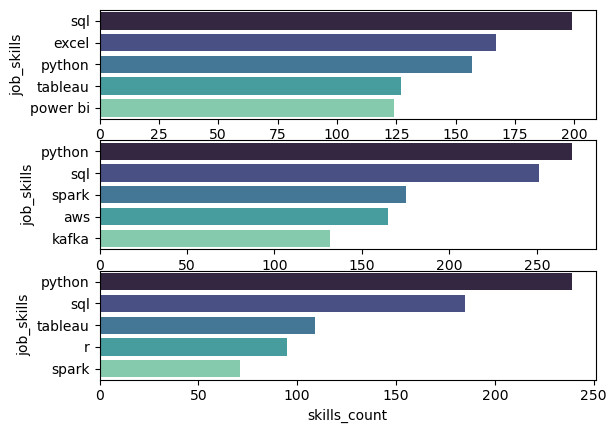

In [7]:
fig, ax= plt.subplots(len(job_titles),1)
for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    sns.barplot(data=df_plot, x='skills_count',y='job_skills',palette='mako',ax=ax[i])

C:\Users\go\AppData\Local\Temp\ipykernel_11120\2774585022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skills_count',y='job_skills',palette='mako',ax=ax[i])
C:\Users\go\AppData\Local\Temp\ipykernel_11120\2774585022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skills_count',y='job_skills',palette='mako',ax=ax[i])
C:\Users\go\AppData\Local\Temp\ipykernel_11120\2774585022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='skills_count',y='job_skills',palette='mako',ax=ax[i])


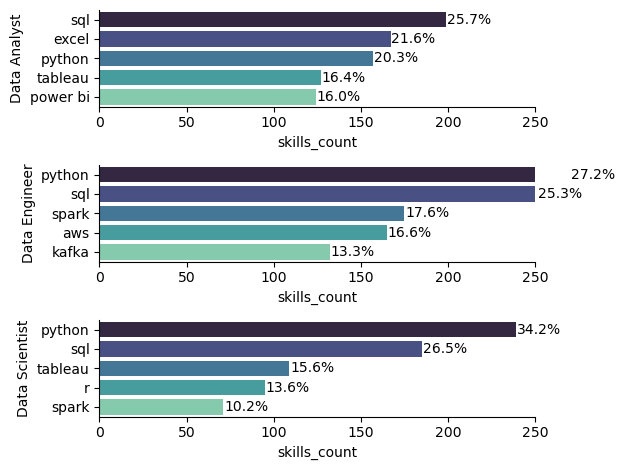

In [8]:
fig, ax= plt.subplots(len(job_titles),1)



for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    sns.barplot(data=df_plot, x='skills_count',y='job_skills',palette='mako',ax=ax[i])
    ax[i].set_ylabel(job_title)
    ax[i].set_xlim(0, 250)
     
     # Calculate percentages
    total = df_plot['skills_count'].sum()
    df_plot['percentage'] = df_plot['skills_count'] / total * 100

        # Annotate each bar with percentage
    for p, perc in zip(ax[i].patches, df_plot['percentage']):
        width = p.get_width()
        ax[i].text(
            width + 0.5,                      # position (a bit to the right of bar)
            p.get_y() + p.get_height() / 2,   # center of the bar
            f'{perc:.1f}%',                   # format percentage
            va='center'
        )

plt.tight_layout()
sns.despine()